# COGS 108 - Data Checkpoint

# Names

- Aasem Fituri
- Casey Hild
- Carlos van der Ley
- Jeremy Quinto

<a id='research_question'></a>
# Research Question

Can we find a correlation between cancer rates and socioeconomic status?  More specifically, how does income, education, and employment status affect cancer rates across the United States?

# Dataset(s)

<!-- *Fill in your dataset information here* -->

<!-- (Copy this information for each dataset) -->
- Dataset Name: cancer_reg
- Link to the dataset: https://www.kaggle.com/datasets/thedevastator/uncovering-trends-in-health-outcomes-and-socioec?select=cancer_reg.csv
- Number of observations: 3047

<!-- 1-2 sentences describing each dataset.  -->


<!-- If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets. -->

# Setup

In [41]:
# Some code in this notebook may have been produced with the help of GitHub CoPilot

In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as smf

The dataset that we have chosen has a total of 3047 data entries.
The following are the relevant column names for our analysis as described on kaggle and data.world: https://www.kaggle.com/datasets/thedevastator/uncovering-trends-in-health-outcomes-and-socioec?select=cancer_reg.csv
https://data.world/exercises/linear-regression-exercise-1

geography: County

avganncount: Average number of cancer cases per year.

avgdeathsperyear: These deaths are specifically cancer deaths.

target_deathrate: This column refers to the number of people who have died due to cancer for every 100,000 people

incidencerate: This column refers to the number of people who got cancer for every 100,000 people

popest2015: The estimated population in 2015.

medianage

medianagemale

medianagefemale

<br>

The following are different education levels:

nohs stands for no high school

somecol stands for some college

bachdeg stands for bachelor's degree

<br>

These columns refer to the percent of people with the respective education in the specified age ranges

pcths25_over

pctbachdeg25_over

<br>

pctemployed16_over: Employment percent for those who are at least 16 years of age

pctunemployed16_over: Unemployment percent for those who are at least 16 years of age

<br>

These two columns refer to the percent of people who with the respective health insurance (private and public). Note that these do not seem to be mutually exclusive

pctprivatecoverage

pctpubliccoverage
<br>

For more information on what the columns specify refer to this: https://data.world/exercises/linear-regression-exercise-1/workspace/data-dictionary

Most of these variables will give us a sense of "socioeconomic status" that we will analyze. This combined with the death rates and incidence rates will hopefully allow us to provide a meaningful analysis on the relationship between socioeconomic status and cancer rates/deaths.

In [43]:
# Reading in the dataset
data_cancer = pd.read_csv('data/cancer_reg.csv')
data_cancer.shape
pd.set_option('display.max_rows', 34)
data_cancer.count()

avganncount                3047
avgdeathsperyear           3047
target_deathrate           3047
incidencerate              3047
medincome                  3047
popest2015                 3047
povertypercent             3047
studypercap                3047
binnedinc                  3047
medianage                  3047
medianagemale              3047
medianagefemale            3047
geography                  3047
percentmarried             3047
pctnohs18_24               3047
pcths18_24                 3047
pctsomecol18_24             762
pctbachdeg18_24            3047
pcths25_over               3047
pctbachdeg25_over          3047
pctemployed16_over         2895
pctunemployed16_over       3047
pctprivatecoverage         3047
pctprivatecoveragealone    2438
pctempprivcoverage         3047
pctpubliccoverage          3047
pctpubliccoveragealone     3047
pctwhite                   3047
pctblack                   3047
pctasian                   3047
pctotherrace               3047
pctmarri

After looking at the data, it seems that the only columns with NA values are pctsomecol18_24 with 762 data points, pctemployed16_over with 2895 data points, and pctprivatecoveragealone with 2438 data points. Due to the low number of data points for pctsomecol18_24, and to narrow our scope, we decided to focus on cancer rates for adults 25 years and older. Thus, we will drop all columns related to the education of adults in the age range of 18-24. Additionally, as it is not our focus, we will drop all columns that pertain to race. Furthermore, due to the large amount of NA values, we will drop the pctprivatecoveragealone column (as well the pctpubliccoverage alone column since it seems to go hand in hand even though there are no missing values). Finally, we will drop the studypercap columns (which indicates the number of studies per capita related to cancer in the given region) as we believe that it is not crucial in our understanding of the effects of socioeconomic factors on the rates of cancer/cancer deaths.

Due to our focus on adults 25 years and older, it seems to be more appropriate to specify this in our research question. Thus, the new research question would be:

Can we find a correlation between cancer rates and socioeconomic status in adults 25 years of age and older?  More specifically, how does income, education, and employment status affect cancer rates across the United States?


# Data Cleaning

In [44]:
# We first begin by removing the columns that are not necessary for our analysis
data_cancer = data_cancer.drop(['studypercap', 'percentmarried', 'pctnohs18_24', 'pcths18_24', 
                  'pctsomecol18_24', 'pctbachdeg18_24', 'pctprivatecoveragealone', 'pctpubliccoveragealone', 'pctwhite',
                  'pctasian', 'pctblack', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'], axis=1)

In [45]:
data_cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,45.272333,39.570725,42.145323,34.804660,13.282015,54.152642,7.852412,64.354939,41.196324,36.252642
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,45.304480,5.226017,5.292849,7.034924,5.394756,8.315064,3.452371,10.647057,9.447687,7.841741
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,22.300000,22.400000,22.300000,7.500000,2.500000,17.600000,0.400000,22.300000,13.500000,11.200000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,37.700000,36.350000,39.100000,30.400000,9.400000,48.600000,5.500000,57.200000,34.500000,30.900000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,41.000000,39.600000,42.400000,35.300000,12.300000,54.500000,7.600000,65.100000,41.100000,36.300000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,44.000000,42.500000,45.300000,39.650000,16.100000,60.300000,9.700000,72.100000,47.700000,41.550000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,624.000000,64.700000,65.700000,54.800000,42.200000,80.100000,29.400000,92.300000,70.700000,65.100000


After looking at some of the descriptive statistics it is clear that there is at least one entry with an unreasonable median age.

In [46]:
len(data_cancer.loc[data_cancer.medianage > 100])

30

In [47]:
data_cancer.loc[data_cancer.medianage > 100]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,medianagefemale,geography,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage
100,89.000000,32,152.3,447.200000,61802,17110,8.2,"(61494.5, 125635]",458.4,36.3,40.7,"Seward County, Nebraska",29.5,18.0,63.4,3.5,83.4,55.0,24.3
181,564.000000,188,135.7,395.400000,56142,139394,12.6,"(54545.6, 61494.5]",469.2,37.6,40.1,"Sandoval County, New Mexico",25.9,16.6,55.1,9.2,63.8,43.1,35.9
225,346.000000,156,176.8,399.000000,44207,62194,14.6,"(42724.4, 45201]",546.0,44.2,46.7,"Pittsylvania County, Virginia",35.3,9.4,53.9,7.7,66.2,42.6,36.2
318,186.000000,93,193.4,406.200000,37122,25345,19.0,"(34218.1, 37413.8]",624.0,51.6,52.5,"Iosco County, Michigan",40.0,10.0,40.4,12.1,61.4,29.4,53.2
425,230.000000,98,198.1,477.800000,45841,39259,18.7,"(45201, 48021.6]",508.8,41.5,43.4,"Person County, North Carolina",35.5,11.3,53.0,11.9,60.0,37.9,39.3
606,35.000000,12,188.8,538.800000,36449,4251,17.3,"(34218.1, 37413.8]",619.2,52.3,50.7,"Mineral County, Montana",41.8,9.8,42.3,11.8,48.3,20.2,53.8
637,140.000000,59,193.1,478.000000,66522,25512,6.9,"(61494.5, 125635]",498.0,40.4,42.4,"Cass County, Nebraska",32.1,16.9,NaN,3.8,83.0,55.4,24.4
843,599.000000,250,207.1,489.900000,39927,128755,22.5,"(37413.8, 40362.7]",412.8,33.0,35.6,"Tangipahoa Parish, Louisiana",35.6,13.4,54.9,10.7,55.4,36.4,38.7
991,85.000000,32,156.5,404.000000,61762,19162,9.6,"(61494.5, 125635]",481.2,39.4,41.4,"Greene County, Virginia",34.9,15.7,60.0,7.4,69.7,50.3,26.1
1199,959.000000,398,206.7,497.400000,41010,201410,18.8,"(40362.7, 42724.4]",424.8,34.2,36.8,"Harrison County, Mississippi",28.8,13.2,54.0,9.7,57.5,32.6,35.9


After looking at the data, we can see that 30 entries have unreasonable median ages. Since these ages do not really make sense, and the number of entries with this erroneous data is small, we can simply drop those entries.

In [48]:
data_cancer

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,medianagefemale,geography,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",23.2,19.6,51.9,8.0,75.1,41.6,32.9
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",26.0,22.7,55.9,7.8,70.2,43.6,31.1
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",29.0,16.0,45.9,7.0,63.7,34.9,42.1
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",31.6,9.3,48.3,12.1,58.4,35.0,45.3
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",33.4,15.0,48.2,4.8,61.6,35.1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",32.2,15.2,51.7,4.3,78.3,44.6,31.7
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",23.1,12.4,70.1,4.6,64.5,48.6,28.8
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",23.0,12.8,64.8,6.4,62.0,47.8,26.6
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",36.1,14.4,NaN,6.9,75.9,49.6,29.5


In [49]:
data_cancer = data_cancer.drop(data_cancer[data_cancer.medianage > 100].index)

In [50]:
data_cancer[data_cancer.medianage > 100]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,medianagefemale,geography,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage


We will now split the geography column into two separate columns: County and State so that we can more easily group together entries within a certain region.

In [51]:
# Adding County, State columns from info in the 'geography' column
data_cancer[['County', 'State']] = data_cancer['geography'].str.split(',', n=1, expand=True)
data_cancer['State'] = data_cancer['State'].str.strip()
data_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,geography,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,County,State
0,1397.0,469,164.9,489.8,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,"Kitsap County, Washington",23.2,19.6,51.9,8.0,75.1,41.6,32.9,Kitsap County,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,"Kittitas County, Washington",26.0,22.7,55.9,7.8,70.2,43.6,31.1,Kittitas County,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,"Klickitat County, Washington",29.0,16.0,45.9,7.0,63.7,34.9,42.1,Klickitat County,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,"Lewis County, Washington",31.6,9.3,48.3,12.1,58.4,35.0,45.3,Lewis County,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,"Lincoln County, Washington",33.4,15.0,48.2,4.8,61.6,35.1,44.0,Lincoln County,Washington


In [52]:
data_cancer['State'].nunique()

51

We first begin by splitting the geography column in separate county and state columns. This lets us easily group data points together into different regions as shown below. We have chosen to group the different states into the regions specified here: https://education.nationalgeographic.org/resource/united-states-regions/

In [53]:
# Assigning a Region to each County based on its state
West = ['California', 'Nevada', 'Hawaii', 'Alaska', 'Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado']
SouthWest = ['Arizona', 'New Mexico', 'Texas', 'Oklahoma']
MidWest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']
SouthEast = ['Kentucky', 'Arkansas', 'Louisiana', 'Mississippi', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Florida', 'Virginia', 'West Virginia', 'District of Columbia', 'Delaware']
NorthEast = ['Maryland', 'Pennsylvania', 'New Jersey', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine']
# Length of all lists combines to 51 (Washington D.C is included)
assert(len(West) + len(SouthWest) + len(MidWest) + len(SouthEast) + len(NorthEast) == 51)

# Create the 'Region' column
data_cancer['Region'] = data_cancer['State'].apply(lambda x: 'West' if x in West else
                                                         'South West' if x in SouthWest else
                                                         'Mid West' if x in MidWest else
                                                         'South East' if x in SouthEast else
                                                         'North East' if x in NorthEast else '')

As we can see, some regions have many more data points than other regions. Here are the populations of the various regions:

In [54]:
data_cancer.groupby('Region').popest2015.sum()

Region
Mid West      66392506
North East    61916962
South East    80832274
South West    33998087
West          66763225
Name: popest2015, dtype: int64

We can also see that some regions have a higher population than other regions. We believe that this difference is appropriate for the purposes of this project as we do not plan to perform any rigorous analysis based on the different regions. We simply think that some useful insight could be provided in our exploratory data analysis by looking at how cancer rates and cancer deaths differ among different regions.

<Axes: xlabel='pctunemployed16_over', ylabel='pctemployed16_over'>

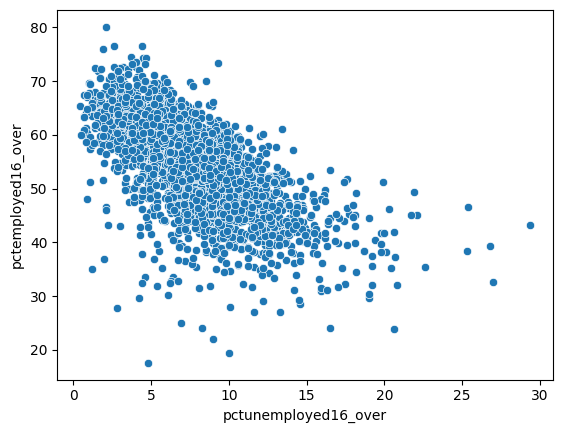

In [55]:
sns.scatterplot(x='pctunemployed16_over', y='pctemployed16_over', data=data_cancer.dropna())

In [56]:
model = smf.ols(formula='pctemployed16_over ~ pctunemployed16_over', data=data_cancer.dropna())
output = model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:     pctemployed16_over   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2069.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        22:36:18   Log-Likelihood:                -9367.3
No. Observations:                2868   AIC:                         1.874e+04
Df Residuals:                    2866   BIC:                         1.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               66.4087 

In [57]:
data_cancer['pctemployed16_over'] = data_cancer['pctemployed16_over'].fillna(data_cancer['pctunemployed16_over']*(-1.5619) + 66.4087)

Based on the linear regression above, it seems that there is a linear relationship between employment rate and unemployment rate as one would expect. Thus, it seems appropriate to fill in missing employment rates by using this linear regression model and using the existing unemployment rate (since there are no missing values for unemployment rates) as the input. It is important to note that employment rate and unemployment rate do not necessarily add up to 1 because a person can be neither employed nor unemployed (e.g. students).

In [58]:
data_cancer

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,County,State,Region
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.90000,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.90000,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.90000,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.30000,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.20000,4.8,61.6,35.1,44.0,Lincoln County,Washington,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,...,32.2,15.2,51.70000,4.3,78.3,44.6,31.7,Ellsworth County,Kansas,Mid West
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,...,23.1,12.4,70.10000,4.6,64.5,48.6,28.8,Finney County,Kansas,Mid West
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,...,23.0,12.8,64.80000,6.4,62.0,47.8,26.6,Ford County,Kansas,Mid West
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,...,36.1,14.4,55.63159,6.9,75.9,49.6,29.5,Franklin County,Kansas,Mid West


We now have our cleaned dataset.